In [58]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from model.utils import *

# Part 1 Pre-Processing

## Labeling Sample

| seq | text                                                                                                                                                         | label     |
|-----|--------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|
| 74  | @116062: will you create a “disaster registry” where fire victims can pick the items they need and anyone can fill them? Offer discounts?                    | pricing   |
| 75  | "@AppleSupport Freezing basically all of the time. Apps are messing up, if i turn on airplane mode and then turn it off i can’t get service without restart" | technical |
| 76  | @VirginTrains I’ve lost my tkt back to Wilmslow. I’ve got receipt and it’s on my app but your staff tell me too bad. Surely not right??                      | technical |
| 77  | @AmazonHelp I ordered a package to be delivered tomorrow but I’ve had a notification saying it’ll be a day late now                                          | delivery  |
| 78  | "@AmazonHelp prime membership says it’s suspended, updated payment method but still says it’s suspended? How do I fix it to get Prime back?"                 | payment   |


In [59]:
df_origin = pd.read_csv(f"{ASSETS}labeled_L2__bucket_sampled.csv")
df_origin.head(10)

,tweet_id,text,label
0,1553020,@480508 @480507 @480506 @XboxSupport It worked in the morning. I just got home and another error 🤦🏻‍♂️ It’s like they haven’t learned how to do it right after all these years,technical
1,433087,UPDATE iOS 11.0.2 😤 iPHONE IS EXTREMELY SLOW NOW FREEZING CRASHES &amp; HAS SHORTEST BATTERY LIFE IN UPDATE HISTORY. #appleios11 @AppleSupport,technical
2,2093386,@467250 Sorry for the inconvenience. Do you see any kind of error message or error code?,technical
3,401610,@210972 I'm sorry for the trouble. Have you tried deleting the app and reinstalling it? Are you seeing an error message? ^CO,technical
4,326051,@193675 We're sorry that you are seeing errors! What device are you using and when are you seeing them?,technical
5,1278976,"@129201 Being a part of customer support, we'll be unable to address your issue related to seller support.1/2 ^SK",technical
6,1039468,"can i ask, why would #Windows10FallCreatorsUpdate always CRASHES MY SOFTWARES THAT IM USING?!?!!?!?!?!?!? @116230 @MicrosoftHelps",technical
7,2035663,"@ATVIAssist Ummm, ok. The error pops up when it try choose zombies or m-player. It wont connect to online services and then says error code 991444.",technical
8,1739395,"@524944 Hi there. I regret the delay. Even with the error received, the items are still received out of the supply drops. ^HB",technical
9,2596906,@AskPlayStation I’ve done everything and nothing will work. I’ve added new cards and keep getting errors. Never had this problem before.,technical


In [60]:
def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r"http\S+", "", txt)  # remove URLs
    txt = re.sub(r"@\w+", "", txt)  # remove @handles
    txt = re.sub(r"[^a-z\s]", " ", txt)  # keep only letters and spaces
    txt = re.sub(r"\s+", " ", txt).strip()  # collapse multiple spaces

    return txt

In [61]:
df_origin['clean_text'] = df_origin['text'].astype(str).apply(clean_text)
df_origin.head(10)

,tweet_id,text,label,clean_text
0,1553020,@480508 @480507 @480506 @XboxSupport It worked in the morning. I just got home and another error 🤦🏻‍♂️ It’s like they haven’t learned how to do it right after all these years,technical,it worked in the morning i just got home and another error it s like they haven t learned how to do it right after all these years
1,433087,UPDATE iOS 11.0.2 😤 iPHONE IS EXTREMELY SLOW NOW FREEZING CRASHES &amp; HAS SHORTEST BATTERY LIFE IN UPDATE HISTORY. #appleios11 @AppleSupport,technical,update ios iphone is extremely slow now freezing crashes amp has shortest battery life in update history appleios
2,2093386,@467250 Sorry for the inconvenience. Do you see any kind of error message or error code?,technical,sorry for the inconvenience do you see any kind of error message or error code
3,401610,@210972 I'm sorry for the trouble. Have you tried deleting the app and reinstalling it? Are you seeing an error message? ^CO,technical,i m sorry for the trouble have you tried deleting the app and reinstalling it are you seeing an error message co
4,326051,@193675 We're sorry that you are seeing errors! What device are you using and when are you seeing them?,technical,we re sorry that you are seeing errors what device are you using and when are you seeing them
5,1278976,"@129201 Being a part of customer support, we'll be unable to address your issue related to seller support.1/2 ^SK",technical,being a part of customer support we ll be unable to address your issue related to seller support sk
6,1039468,"can i ask, why would #Windows10FallCreatorsUpdate always CRASHES MY SOFTWARES THAT IM USING?!?!!?!?!?!?!? @116230 @MicrosoftHelps",technical,can i ask why would windows fallcreatorsupdate always crashes my softwares that im using
7,2035663,"@ATVIAssist Ummm, ok. The error pops up when it try choose zombies or m-player. It wont connect to online services and then says error code 991444.",technical,ummm ok the error pops up when it try choose zombies or m player it wont connect to online services and then says error code
8,1739395,"@524944 Hi there. I regret the delay. Even with the error received, the items are still received out of the supply drops. ^HB",technical,hi there i regret the delay even with the error received the items are still received out of the supply drops hb
9,2596906,@AskPlayStation I’ve done everything and nothing will work. I’ve added new cards and keep getting errors. Never had this problem before.,technical,i ve done everything and nothing will work i ve added new cards and keep getting errors never had this problem before


# Part 2 Feature Engineering 

## Todo

- 使用 TF-IDF 向量化文本
- 采用 装袋（Bagging）策略
  - 从主数据中随机采样10组子集
  - 每组单独构造一个 TF-IDF 特征空间
  - 每组都可作为一次训练任务

In [40]:
# Bagging Optional
# Todo Mark Bagging未启用
# def generate_bagged_tfidf_sets(
#         df, 
#         text_col='clean_text', 
#         label_col='label', 
#         n_bags=10, 
#         sample_frac=0.7, 
#         max_features=1000, 
#         customstop_words=None, 
#         random_state=42):
#     """
#     从清洗后的df中采样构造TF-IDF特征组，用于Bagging建模。
#     返回：X_list（稀疏矩阵列表）, y_list（标签数组列表）
#     """
#     X_list = []
#     y_list = []
#     
#     label_encoder = LabelEncoder()
#     df = df.copy()
#     df[label_col] = label_encoder.fit_transform(df[label_col].astype(str))
# 
#     for i in range(n_bags):
#         df_sample = df.sample(frac=sample_frac, random_state=random_state + i)
#         tfidf = TfidfVectorizer(customstop_words=customstop_words, max_features=max_features)
#         X = tfidf.fit_transform(df_sample[text_col])
#         y = df_sample[label_col].values
# 
#         X_list.append(X)
#         y_list.append(y)
# 
#     return X_list, y_list, label_encoder.classes_

In [41]:
# 10组稀疏特征训练集
# X_list, y_list, label_names = generate_bagged_tfidf_sets(df_origin)
# print(label_names)

# Part 3 Training & Testing

| category of risk            | description                     |
|-----------------------------|---------------------------------|
| technical                   | 系统/技术故障，如崩溃、报错                  |
| payment                     | 扣费异常、支付失败                       |
| delivery                    | 配送延误、丢件、送错货等                    |
| account                     | 账号冻结、登录失败、权限问题                  |
| service                     | 客服响应慢、客服态度差等                    |
| pricing                     | 价格争议、不一致                        |
| legal                       | 版权、虚假宣传、数据泄露、违法行为               |



In [84]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

combined_stopwords = list(ENGLISH_STOP_WORDS.union(custom_stop_words))

tfidf = TfidfVectorizer(
    stop_words=combined_stopwords,
    lowercase=True,
    token_pattern=r"(?u)\b\w+\b",
    max_features=1000
)

X = tfidf.fit_transform(df_origin['clean_text'])
le = LabelEncoder()
y = le.fit_transform(df_origin['label'].values)

In [85]:
# Mark 重要，保持标签名和顺序绑定一致，用于所有图表
ordered_label_names = RiskLabel.get_names()[0:7]
print(ordered_label_names)

['legal', 'account', 'payment', 'technical', 'delivery', 'service', 'pricing']


In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y, 
    test_size=0.2, 
    random_state=42
)

# 训练
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

/Users/Matthew/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:23:57] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [87]:
# 分支任务，划分训练集之前保留分词向量原文本，用于识别错分任务
# 暂保留 clean_text 原文列
df_origin["label_id"] = y  # 加入编码后的标签
df_origin["tfidf_vector"] = list(X.toarray())

df_train, df_test = train_test_split(df_origin, test_size=0.2, stratify=df_origin["label_id"], random_state=42)

X_train = tfidf.transform(df_train["clean_text"])
X_test = tfidf.transform(df_test["clean_text"])

y_train = df_train["label_id"]
y_test = df_test["label_id"]

# 预测
y_pred = model.predict(X_test)

# 标记
mask = y_pred != y_test

# 错误样本
df_miss = df_test[mask].copy()
df_miss["predicted"] = y_pred[mask]

df_miss[["clean_text", "label_id", "predicted"]].head(10)

df_miss["true_label"] = le.inverse_transform(df_miss["label_id"])
df_miss["pred_label"] = le.inverse_transform(df_miss["predicted"])

df_miss = df_miss[["tweet_id", "clean_text", "true_label", "pred_label"]]

df_miss.head(200).to_csv(f"{ASSETS}missed_label_200.csv", index=False, encoding='utf-8-sig')

df_miss.head(10)

,tweet_id,clean_text,true_label,pred_label
1718,2306395,worst customer service ever string of broken promises time to call trading standards,technical,service
4536,1362497,i ve been doing that they contacted the courier who tried to say it s the wrong address which hasn t changed in over a decade i got a copy and past response from the cs team trying to tell me this is an isolated incident but it s most definitely not,delivery,account
7193,1937744,after having scammed from my bank account through on i spent over an hour being transfered through diff depts being told i would receive a full refund eventually rude staff member dan said he would not refund me livid,legal,payment
7173,2943742,hi many peoples doing uber eat fraud with get uber month old account its can login in app without any otp asking please resolve your this bug for other details message me in dm,legal,account
2897,279346,do u hav any sla i hav been waitin wit patience frm last dz no status is bein shared u lockd my acct n nw nt refundin money as wel,payment,delivery
7146,2227811,have been dropping d issue on ur call line and u gave me that id only to block me from contacting d cal center again so u check d code u gave me and do d needful just rev and it s taking almost days jesus even if it s a snail network crapairtel airtelsuck rubbish scammers,legal,technical
6471,1674311,thanks not letting me get on the plane even though it was still on gate love that execplatinum treatment rudeattendant,service,delivery
6967,1572789,please know gogoinflight is unreliable costly and poor quality worst part of flying as why do you keep them,pricing,service
128,2013977,every time eye type the letter i a box comes up eye have iphone with the latest update buggy,technical,delivery
467,2808709,spent an hour on the phone yesterday only to be told our domain hadn t been allocated dns as your system had a que hours later still no dns allocated no time for inexperienced call centre so will have to host it elsewhere cutemailsupporttogetridofpeople,technical,delivery


In [90]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=ordered_label_names))

              precision    recall  f1-score   support

       legal       0.93      0.90      0.92        60
     account       0.93      0.98      0.95       420
     payment       0.97      0.72      0.83        40
   technical       0.98      0.97      0.98       300
    delivery       0.85      0.77      0.81        30
     service       0.93      0.94      0.94       240
     pricing       0.98      0.96      0.97       360

    accuracy                           0.95      1450
   macro avg       0.94      0.89      0.91      1450
weighted avg       0.95      0.95      0.95      1450



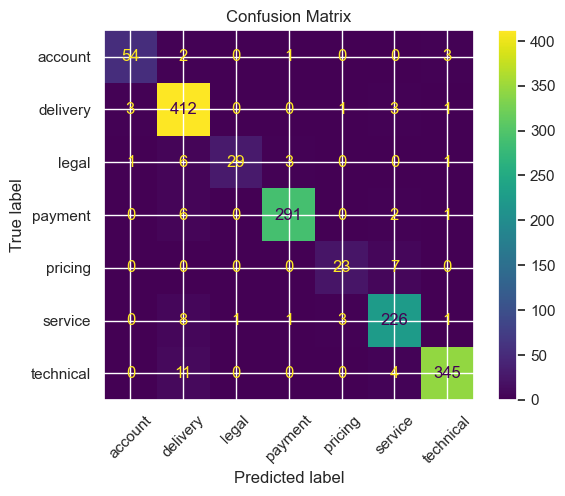

In [91]:
# 软换标签由编码到文字
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
disp.ax_.set_title("Confusion Matrix")
plt.xticks(rotation=45)
plt.savefig("../../plot/Confusion Matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [92]:
save_predictions(y_test, y_pred, f'{ASSETS}y_true_pred.pkl')

Predictions saved to ../../assets/y_true_pred.pkl


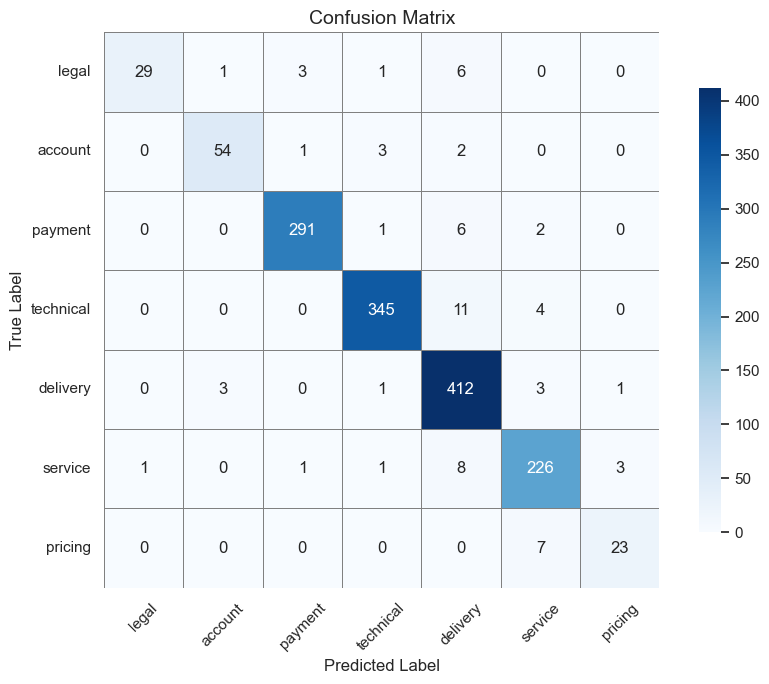

In [93]:
# Seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 获取 confusion matrix（按 label 名称传入）
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=ordered_label_names)

# 创建 DataFrame 以匹配 sns.heatmap
df_cm = pd.DataFrame(cm, index=ordered_label_names, columns=ordered_label_names)

plt.figure(figsize=(9, 7))
sns.set(font_scale=1.0)
sns.heatmap(
    df_cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',          
    linewidths=0.5, 
    linecolor='gray', 
    square=True,
    cbar_kws={'shrink': 0.8}
)

plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../../plot/Confusion Matrix.png", dpi=120, bbox_inches='tight')
plt.show()

In [76]:
# 错误样本分析

# 统一为Series（防止索引不一致）
y_test_series = pd.Series(y_test).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

# 如果 X_test 是文本/一列
X_test_series = X_test[:, 0].reset_index(drop=True)

# 错误样本 
mask = y_test_series != y_pred_series

# 抽出错误样本
df_misclassified = pd.DataFrame({
    "Text": X_test_series[mask],
    "True Label": y_test_series[mask],
    "Predicted Label": y_pred_series[mask]
})

df_misclassified.head(10)

AttributeError: 'csr_matrix' object has no attribute 'reset_index'